In [1]:
from functools import reduce
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE, BOX_SIZE = 100, 20

In [33]:
def get_tshape_img(img_size: int = IMG_SIZE, box_size: int = BOX_SIZE) -> np.array:
    _img = np.zeros(shape=(img_size, img_size), dtype=float)
    
    def assign_square(
        __img, __ref_start_i, __ref_start_j,
        __ref_stop_i, __ref_stop_j
    ):
        max_i = max(__ref_start_i, __ref_stop_i)
        min_i = min(__ref_start_i, __ref_stop_i)
        max_j = max(__ref_start_j, __ref_stop_j)
        min_j = min(__ref_start_j, __ref_stop_j)
        for i in range(min_i, max_i):
            for j in range(min_j, max_j):
                __img[i, j] = 1
        return __img
    
    ## T-shape
    _ref_start_j = int(img_size/2 - box_size/2)
    _ref_start_i = int(img_size/5)
    _ref_stop_j = int(img_size/2 + box_size/2)
    _ref_stop_i = int(4*img_size/5)
    _img = assign_square(_img, _ref_start_i, _ref_start_j, _ref_stop_i, _ref_stop_j)
    
    _ref_start_j = int(img_size/5)
    _ref_start_i = int(img_size/5)
    _ref_stop_j = int(4*img_size/5)
    _ref_stop_i = int(2*img_size/5)
    _img = assign_square(_img, _ref_start_i, _ref_start_j, _ref_stop_i, _ref_stop_j)
    
    ## Cross
#     _img = assign_square(_img, 40, 10, 60, 90)
#     _img = assign_square(_img, 10, 40, 90, 60)
    
    return _img

In [34]:
def opening(_img: np.array, _kernel: np.array) -> np.array:
    return cv2.dilate(
        cv2.erode(
            _img,
            _kernel
        )
        , _kernel
    )

def skeleton_img(_img: np.array, kernel: np.array) -> np.array:
    K = 0
    skel = np.zeros(_img.shape,np.uint8)
    while True:
        s_k = np.maximum(
            np.subtract(_img, opening(_img, kernel)),
            0
        )
        skel = np.bitwise_or(skel.astype(bool), s_k.astype(bool)).astype(int)
        _img = cv2.erode(_img, kernel)
        K += 1
        if cv2.countNonZero(_img) == 0:
            print(f"End K: {K}")
            break
    return skel

Kernel :
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
End K: 10


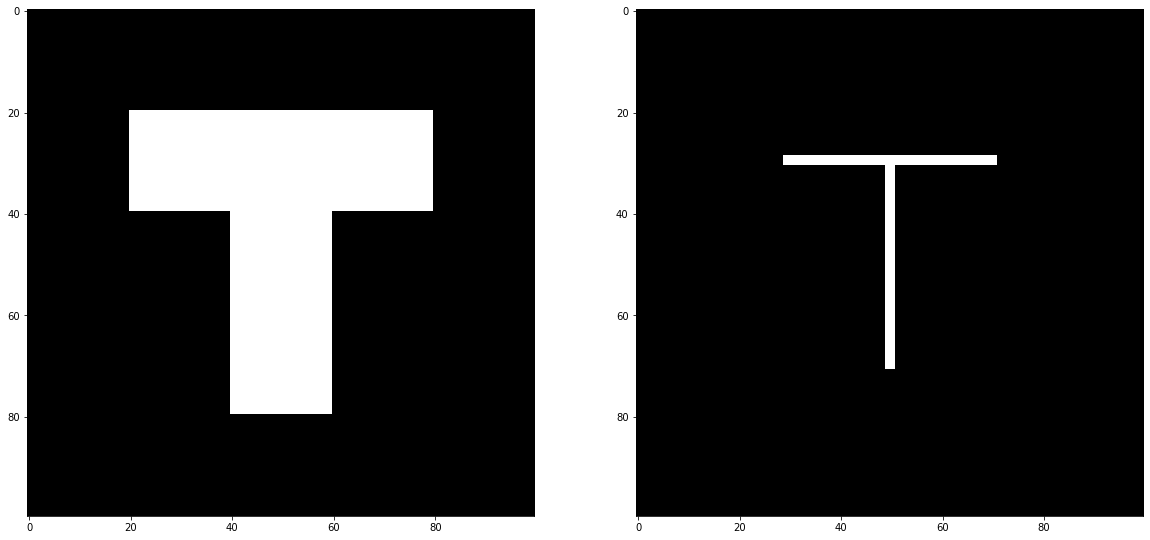

In [35]:
tshape_img = get_tshape_img()
# mykernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mykernel = np.ones((3,3))

print("Kernel :\n", mykernel)
skel_img = skeleton_img(tshape_img, mykernel)

fig, axarr = plt.subplots(1,2, figsize = (20,10))
axarr[0].imshow(tshape_img, cmap = 'gray')
axarr[1].imshow(skel_img, cmap = 'gray')